In [53]:
import pandas as pd

# Load datasets
train_url = 'titanic_train.csv'
test_url = 'titanic_test.csv'

titanic_train = pd.read_csv(train_url)
titanic_test = pd.read_csv(test_url)

# Display the first few rows of the training dataset
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
# Check for missing values in the training dataset
print(titanic_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


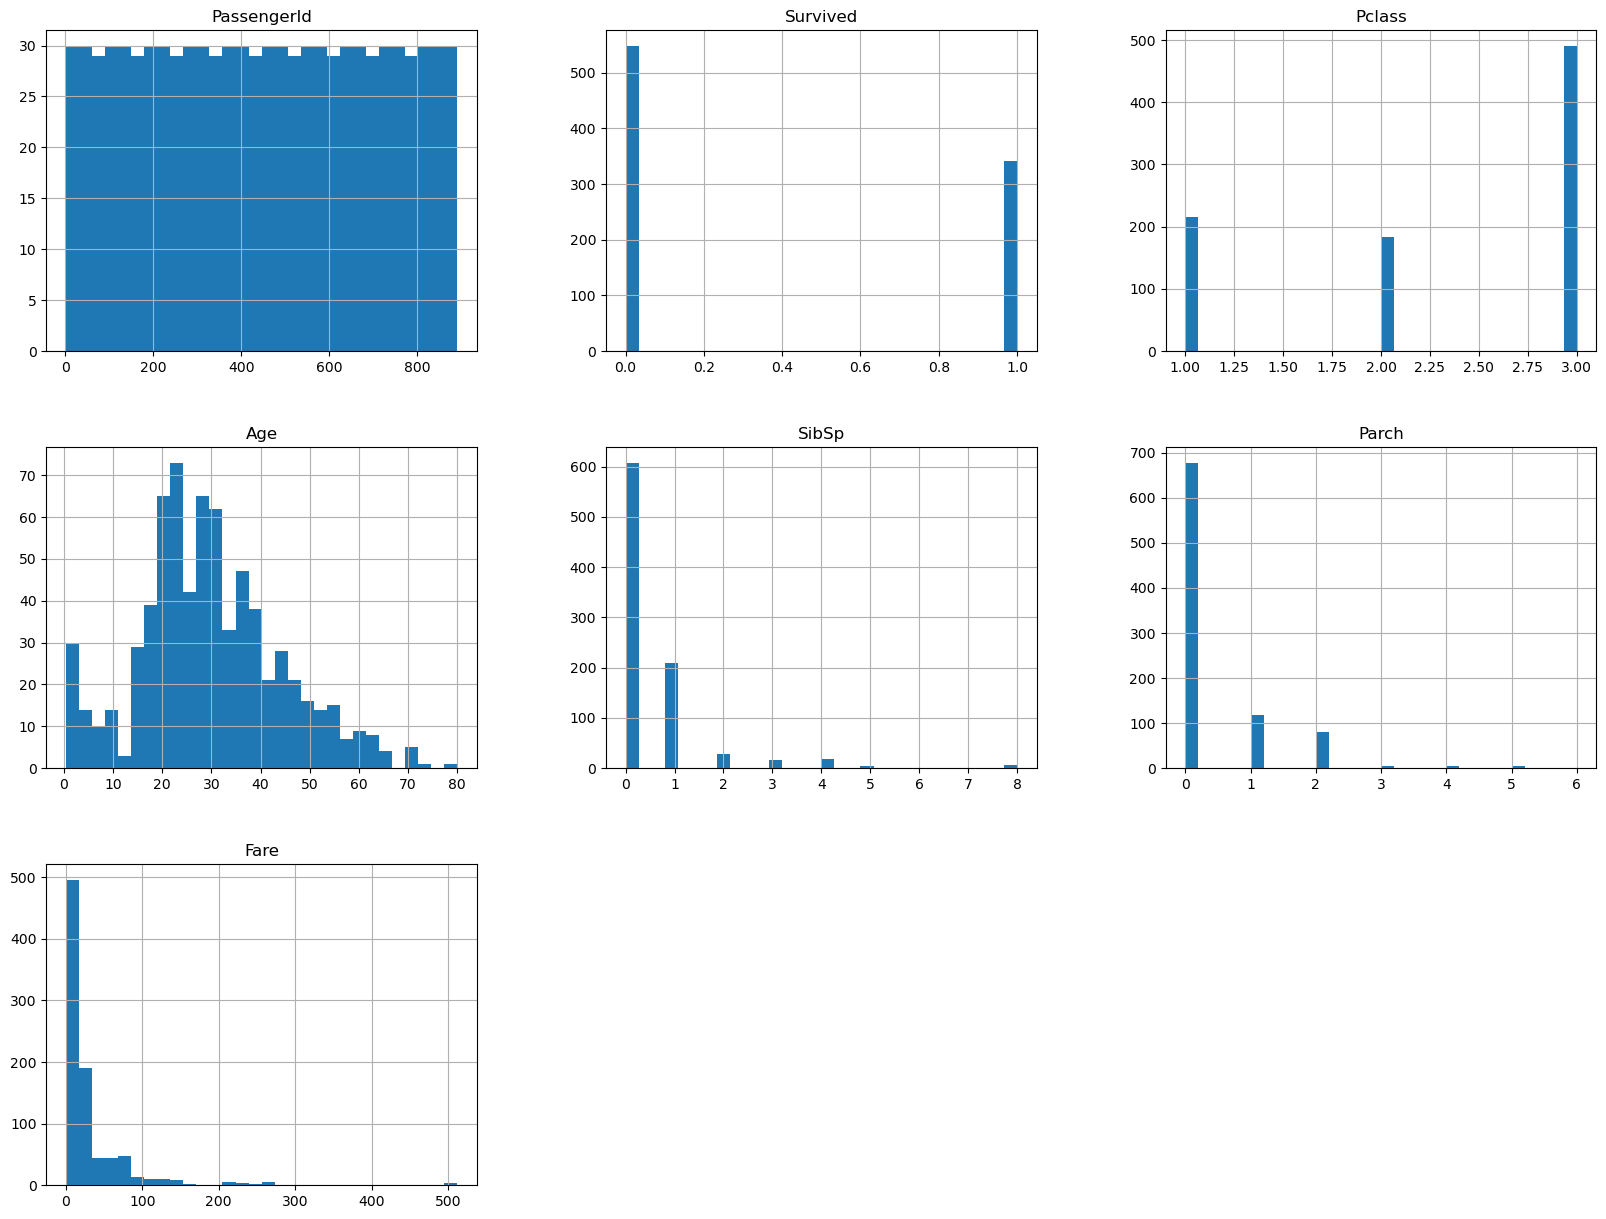

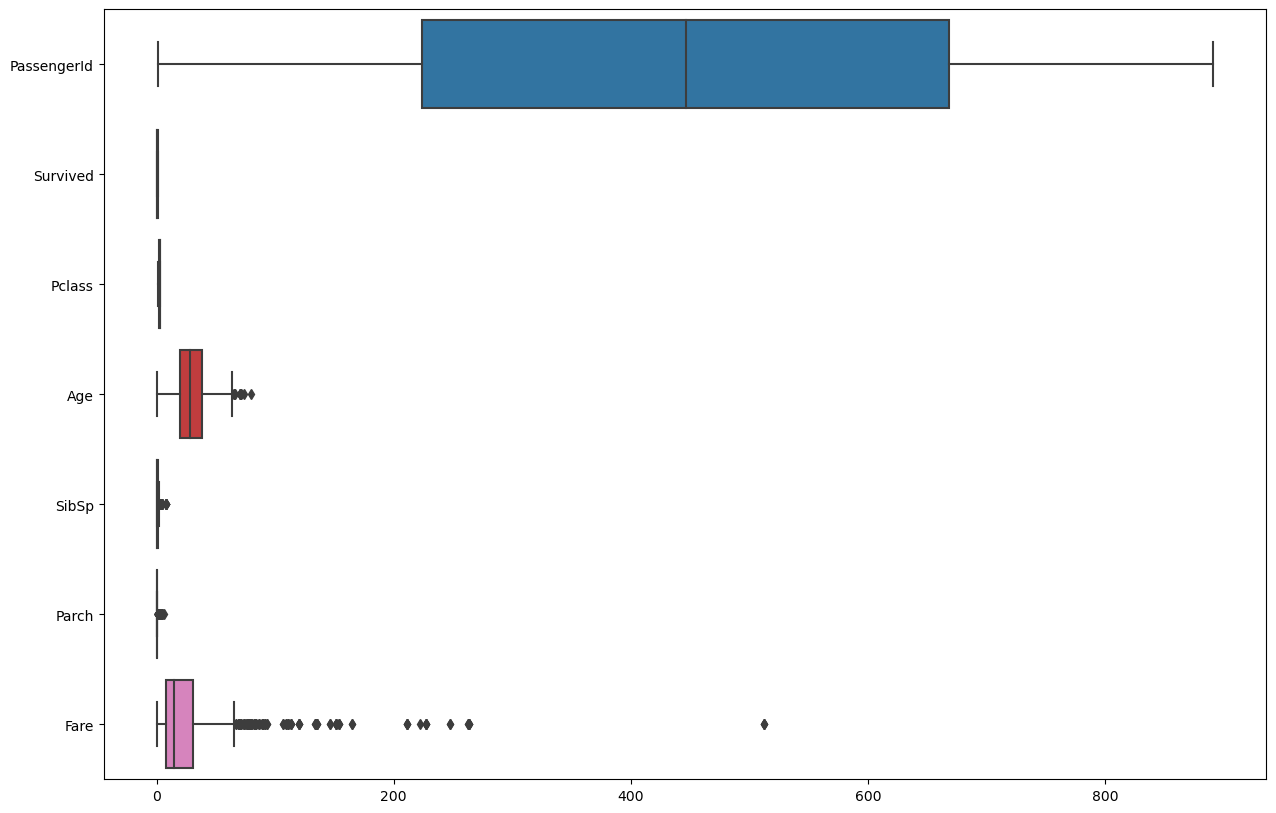

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for the training dataset
titanic_train.hist(bins=30, figsize=(20, 15))
plt.show()

# Box plots for the training dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data=titanic_train, orient='h')
plt.show()


C:\Users\Reshma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


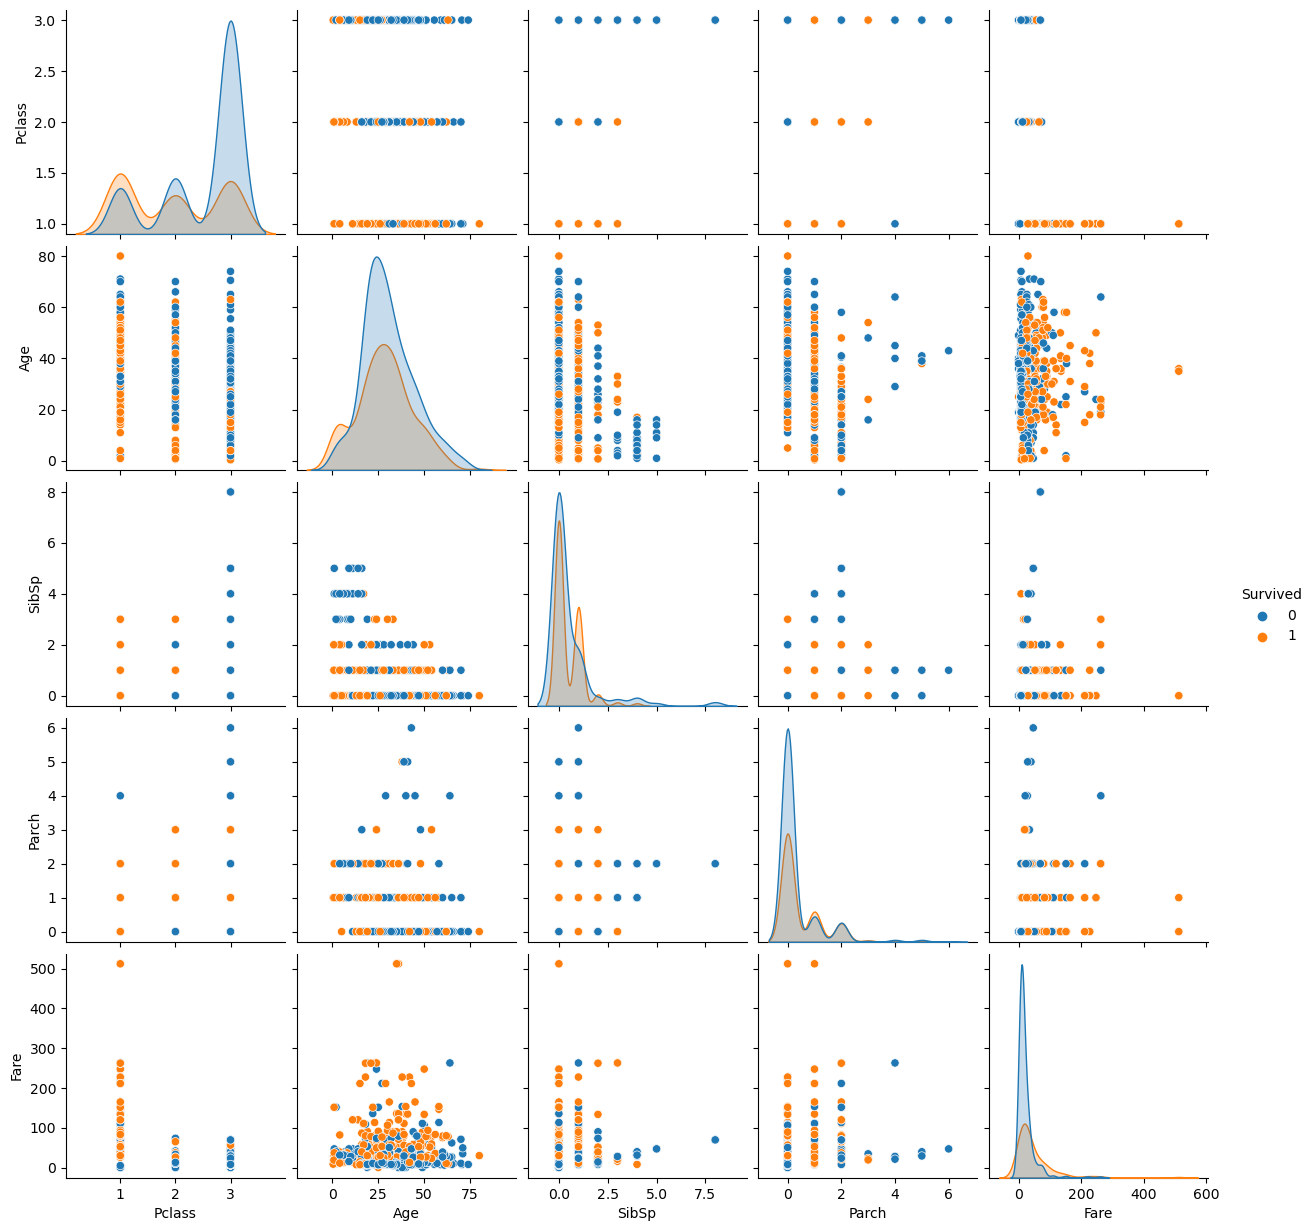

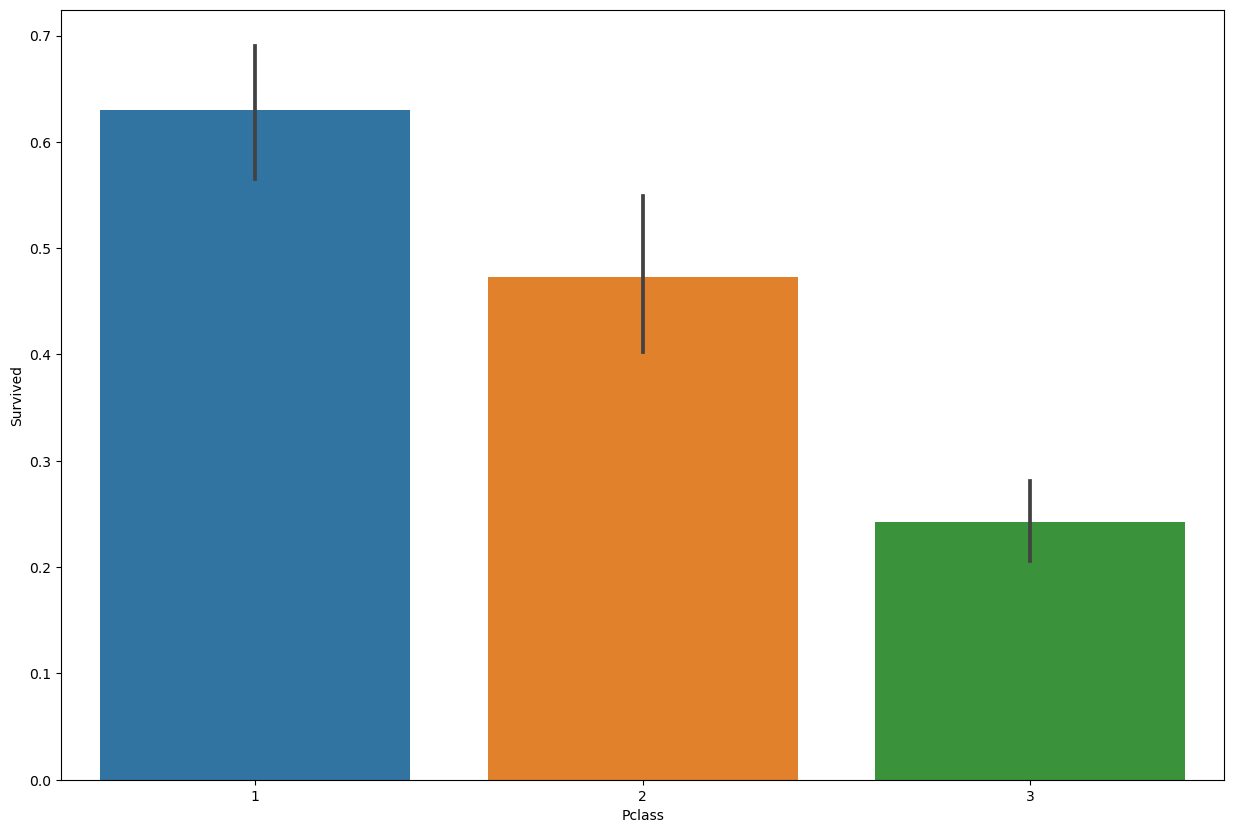

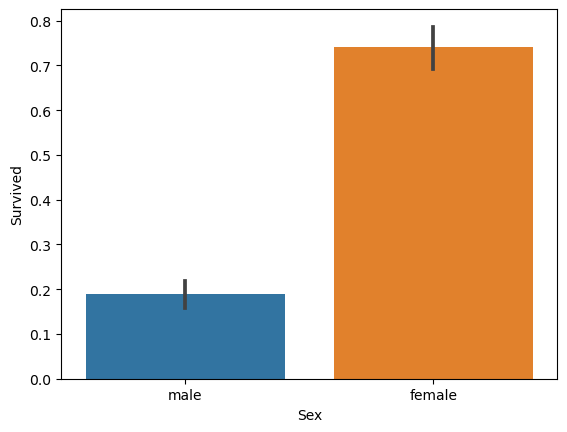

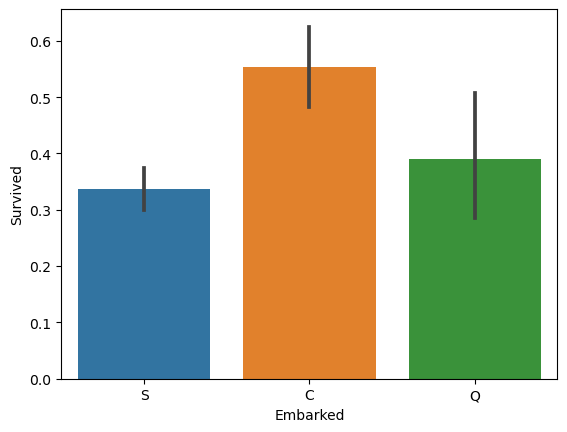

In [61]:
# Scatter plots
sns.pairplot(titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1), hue='Survived')
plt.show()

# Bar plots for categorical variables
plt.figure(figsize=(15, 10))
sns.barplot(x='Pclass', y='Survived', data=titanic_train)
plt.show()

sns.barplot(x='Sex', y='Survived', data=titanic_train)
plt.show()

sns.barplot(x='Embarked', y='Survived', data=titanic_train)
plt.show()


In [62]:
# Impute missing values in the training dataset
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
titanic_train['Fare'].fillna(titanic_train['Fare'].median(), inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
titanic_train.drop(columns=['Cabin'], inplace=True)

# Verify missing values are imputed
print(titanic_train.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [63]:
# Impute missing values in the training dataset
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)
titanic_train['Fare'].fillna(titanic_train['Fare'].median(), inplace=True)

# Verify missing values are impu())ted
print(titanic_train.isnull().sum


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [64]:
# Encode categorical variables in the training dataset
titanic_train = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'], drop_first=True)
titanic_train['Pclass'] = titanic_train['Pclass'].astype(str)
titanic_train = pd.get_dummies(titanic_train, columns=['Pclass'], drop_first=True)

# Drop irrelevant columns
titanic_train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Apply the same preprocessing steps to the test dataset
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace=True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)
titanic_test.drop(columns=['Cabin'], inplace=True)
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True)
titanic_test['Pclass'] = titanic_test['Pclass'].astype(str)
titanic_test = pd.get_dummies(titanic_test, columns=['Pclass'], drop_first=True)
titanic_test.drop(columns=['Name', 'Ticket'], inplace=True)


In [65]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
import lightgbm as lgb

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_val)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_val, y_pred):
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return accuracy, precision, recall, f1

lgb_metrics = evaluate_model(y_val, y_pred_lgb)
print(f'LightGBM - Accuracy: {lgb_metrics[0]}, Precision: {lgb_metrics[1]}, Recall: {lgb_metrics[2]}, F1 Score: {lgb_metrics[3]}')


[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [67]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
xgb_metrics = evaluate_model(y_val, y_pred_xgb)
print(f'XGBoost - Accuracy: {xgb_metrics[0]}, Precision: {xgb_metrics[1]}, Recall: {xgb_metrics[2]}, F1 Score: {xgb_metrics[3]}')


XGBoost - Accuracy: 0.7798507462686567, Precision: 0.7549019607843137, Recall: 0.6936936936936937, F1 Score: 0.7230046948356808


In [68]:
metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_metrics[0], xgb_metrics[0]],
    'Precision': [lgb_metrics[1], xgb_metrics[1]],
    'Recall': [lgb_metrics[2], xgb_metrics[2]],
    'F1 Score': [lgb_metrics[3], xgb_metrics[3]]
})

print(metrics_df)


      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.817164   0.810000  0.729730  0.767773
1   XGBoost  0.779851   0.754902  0.693694  0.723005


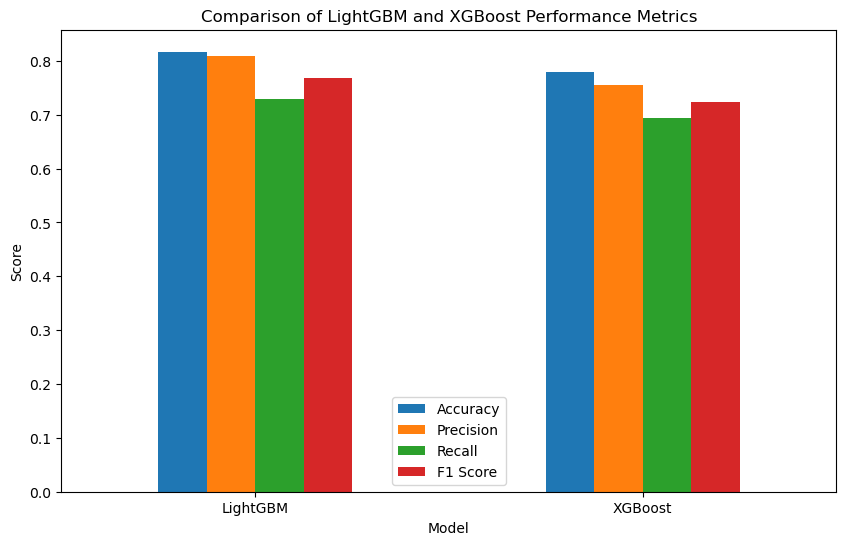

In [69]:
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of LightGBM and XGBoost Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()


In [70]:
# Display the preprocessed training data
print(X_train.head())
print(X_val.head())


      Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
445   4.0      0      2  81.8583         1           0           1         0   
650  28.0      0      0   7.8958         1           0           1         0   
172   1.0      1      1  11.1333         0           0           1         0   
450  36.0      1      2  27.7500         1           0           1         1   
314  43.0      1      1  26.2500         1           0           1         1   

     Pclass_3  
445         0  
650         1  
172         1  
450         0  
314         0  
      Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  Pclass_2  \
709  28.0      1      1  15.2458         1           0           0         0   
439  31.0      0      0  10.5000         1           0           1         1   
840  20.0      0      0   7.9250         1           0           1         0   
720   6.0      0      1  33.0000         0           0           1         1   
39   14.0      1      0

In [71]:
# Initialize and train the LightGBM model with adjusted parameters
lgb_model = lgb.LGBMClassifier(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_val)

# Evaluate the model
lgb_metrics = evaluate_model(y_val, y_pred_lgb)
print(f'LightGBM - Accuracy: {lgb_metrics[0]}, Precision: {lgb_metrics[1]}, Recall: {lgb_metrics[2]}, F1 Score: {lgb_metrics[3]}')


[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


      Feature  Importance
3        Fare        1079
0         Age         759
6  Embarked_S         109
1       SibSp          98
4    Sex_male          90
8    Pclass_3          73
2       Parch          62
7    Pclass_2          45
5  Embarked_Q          28


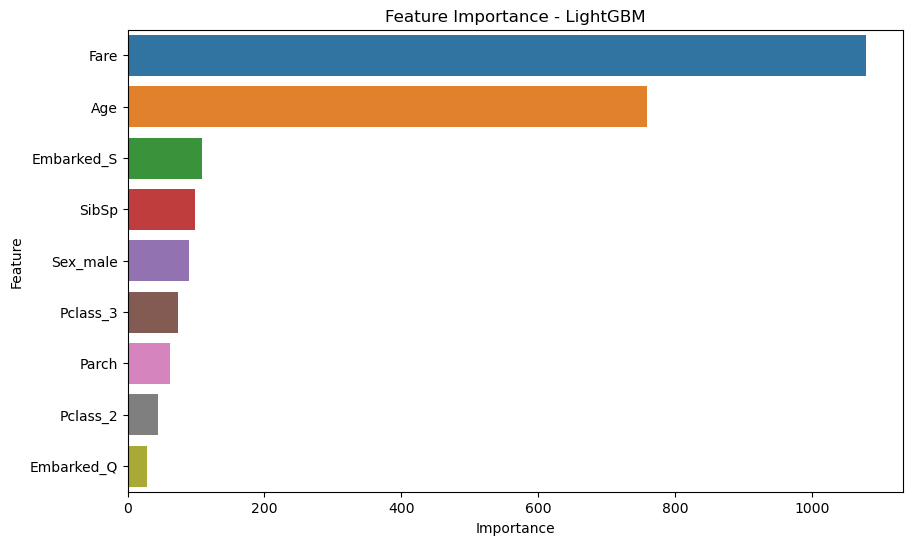

In [72]:
# Check feature importance
feature_importances = lgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - LightGBM')
plt.show()


In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Train the best model
best_lgb_model = grid_search.best_estimator_
best_lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = best_lgb_model.predict(X_val)

# Evaluate the best model
lgb_metrics = evaluate_model(y_val, y_pred_lgb)
print(f'LightGBM - Best Model Accuracy: {lgb_metrics[0]}, Precision: {lgb_metrics[1]}, Recall: {lgb_metrics[2]}, F1 Score: {lgb_metrics[3]}')


[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f